<a href="https://colab.research.google.com/github/dimsparagis0210/MLTask/blob/main/ML_Task_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Απαλλακτική εργασία στο μάθημα Μηχανική Μάθηση**

**Σπαράγγης Δημήτρης (ics22066)**
</br>
**Βιτσιώτη Μαγδαληνή (ics22031)**

# Introduction

### The goal of this project is to build and compare Machine Learning models that predict the likelihood of a patient's death due to COVID-19, based on demographic, medical, and treatment-related data. Using the death column as the dependent variable, the task is framed as a binary classification problem where:

### **1 indicates the patient died.**
### **0 indicates the patient survived.**

## Getting Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Getting data from Google Drive
file_path = '/content/drive/MyDrive/ML_task/Covid Data.csv'
df = pd.read_csv(file_path)

# Check the dataset
print(df.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

# Data Preprocessing

### Checking for missing values in every column (Missing values are represented by 97, 98 and 99)


In [ ]:
import numpy as np

# Replace placeholders with NaN
df = df.replace([97, 98, 99], np.nan)

# Iterate over columns and print nullable values
for col in df.columns:
    print("Column:", col)
    print("Nullables:", df[col].isnull().sum())

Column: USMER
Nullables: 0
Column: MEDICAL_UNIT
Nullables: 0
Column: SEX
Nullables: 0
Column: PATIENT_TYPE
Nullables: 0
Column: DATE_DIED
Nullables: 0
Column: INTUBED
Nullables: 855869
Column: PNEUMONIA
Nullables: 16003
Column: AGE
Nullables: 345
Column: PREGNANT
Nullables: 527265
Column: DIABETES
Nullables: 3338
Column: COPD
Nullables: 3003
Column: ASTHMA
Nullables: 2979
Column: INMSUPR
Nullables: 3404
Column: HIPERTENSION
Nullables: 3104
Column: OTHER_DISEASE
Nullables: 5045
Column: CARDIOVASCULAR
Nullables: 3076
Column: OBESITY
Nullables: 3032
Column: RENAL_CHRONIC
Nullables: 3006
Column: TOBACCO
Nullables: 3220
Column: CLASIFFICATION_FINAL
Nullables: 0
Column: ICU
Nullables: 856032


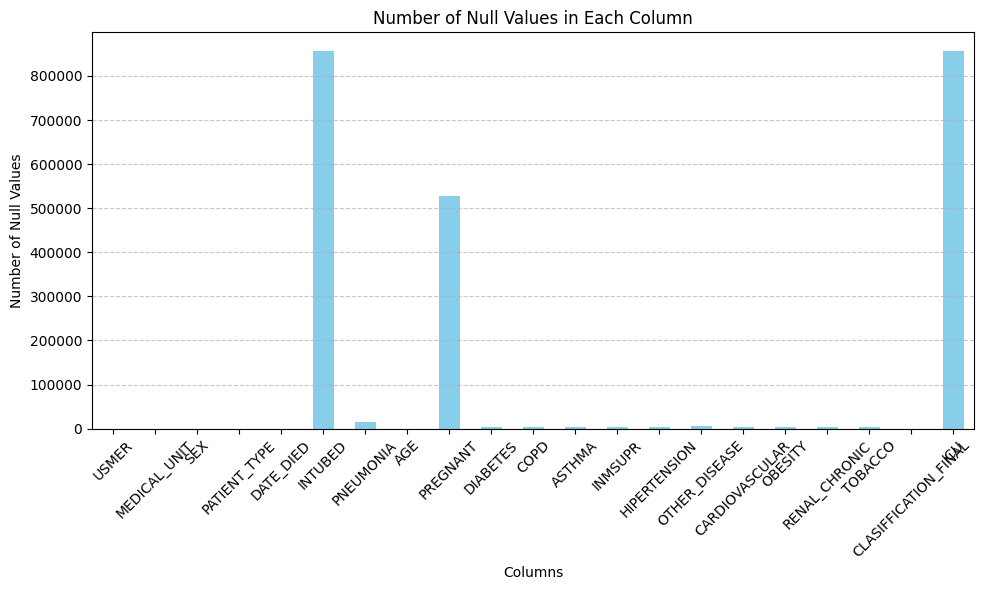

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of null values per column
null_counts = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Transforming the DATE_DIED Column into a binary Classifier

In [ ]:
df['DATE_DIED'] = [0 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]
df['DATE_DIED'].value_counts()

,count
DATE_DIED,
0,971633
1,76942


### Excluding INTUBED and ICU columns because of high number of missing values

In [ ]:
df.drop(['ICU', 'INTUBED'], axis=1, inplace = True)
df.shape

(1048575, 19)

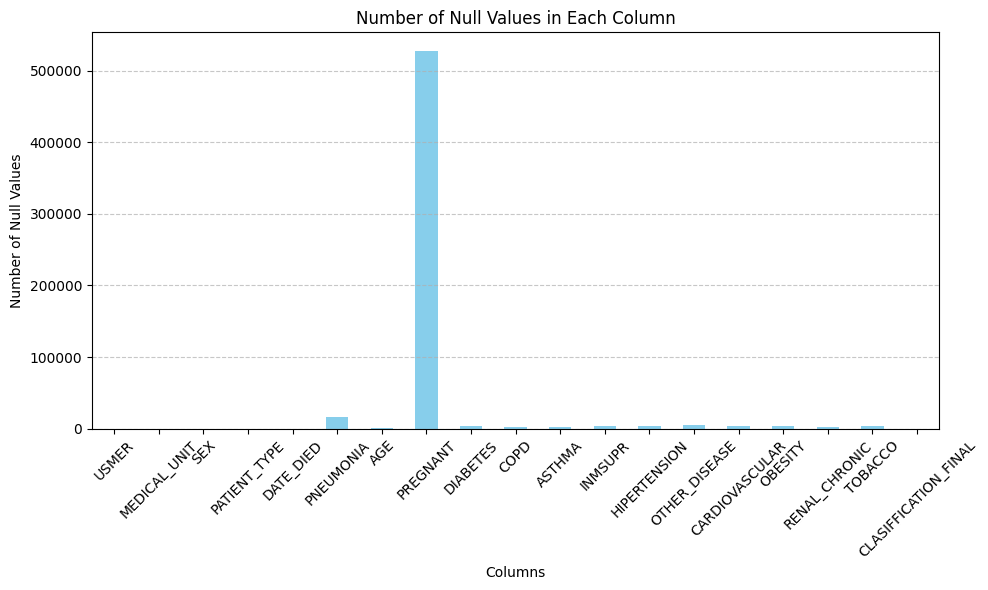

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of null values per column
null_counts = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Handling missing values in columns PNEUMONIA, AGE, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO

In [ ]:
from sklearn.impute import SimpleImputer

columns = ['PNEUMONIA', 'PREGNANT','AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Imputing missing values with median strategy
for col in columns:
  imputer = SimpleImputer(strategy='median')
  df[col] = imputer.fit_transform(df[[col]])

In [ ]:
import numpy as np

# Replace placeholders with NaN
df = df.replace([97, 98, 99], np.nan)

# Iterate over columns and print nullable values
for col in df.columns:
    print("Column:", col)
    print("Nullables:", df[col].isnull().sum())

Column: USMER
Nullables: 0
Column: MEDICAL_UNIT
Nullables: 0
Column: SEX
Nullables: 0
Column: PATIENT_TYPE
Nullables: 0
Column: DATE_DIED
Nullables: 0
Column: PNEUMONIA
Nullables: 0
Column: AGE
Nullables: 0
Column: PREGNANT
Nullables: 0
Column: DIABETES
Nullables: 0
Column: COPD
Nullables: 0
Column: ASTHMA
Nullables: 0
Column: INMSUPR
Nullables: 0
Column: HIPERTENSION
Nullables: 0
Column: OTHER_DISEASE
Nullables: 0
Column: CARDIOVASCULAR
Nullables: 0
Column: OBESITY
Nullables: 0
Column: RENAL_CHRONIC
Nullables: 0
Column: TOBACCO
Nullables: 0
Column: CLASIFFICATION_FINAL
Nullables: 0


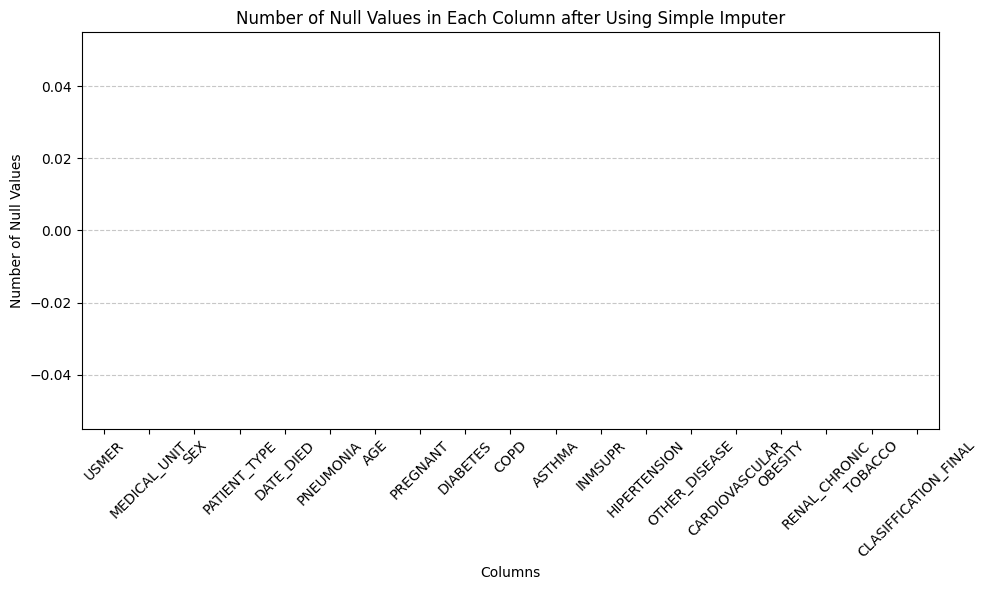

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of null values per column
null_counts = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Each Column after Using Simple Imputer')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Encoding the columns with categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder

boolean_columns = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'USMER']

for col in boolean_columns:
  df[col] = LabelEncoder().fit_transform(df[col])

### Checking for class imbalance

In [ ]:
print("Class distribution in 'classification':")
print(df['DATE_DIED'].value_counts())

Class distribution in 'classification':
DATE_DIED
0    971633
1     76942
Name: count, dtype: int64


Distribution of the dependent variable: 
DATE_DIED
0    971633
1     76942
Name: count, dtype: int64


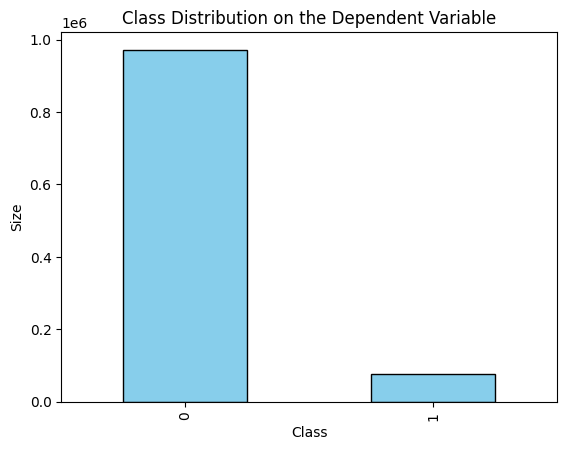

In [ ]:
import matplotlib.pyplot as plt

# Checking for class imbalance
class_distribution = df['DATE_DIED'].value_counts()

print("Distribution of the dependent variable: ")
print(class_distribution)

# Diagram
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution on the Dependent Variable")
plt.xlabel("Class")
plt.ylabel("Size")
plt.show()

We can see that there is high class imbalance(Few people have died from COVID)

### Feature Scaling

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.321942e-01,8.980565e+00,4.992595e-01,1.907646e-01,7.337768e-02,8.664492e-01,4.177507e+01,9.922457e-01,8.808011e-01,9.856357e-01,9.698906e-01,9.864864e-01,8.448094e-01,9.732589e-01,9.801931e-01,8.475874e-01,9.819717e-01,9.195327e-01,5.305653e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,2.607556e-01,3.401692e-01,1.687679e+01,8.771665e-02,3.240226e-01,1.189871e-01,1.708885e-01,1.154598e-01,3.620865e-01,1.613257e-01,1.393362e-01,3.594205e-01,1.330537e-01,2.720154e-01,1.881165e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
50%,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
75%,1.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
max,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


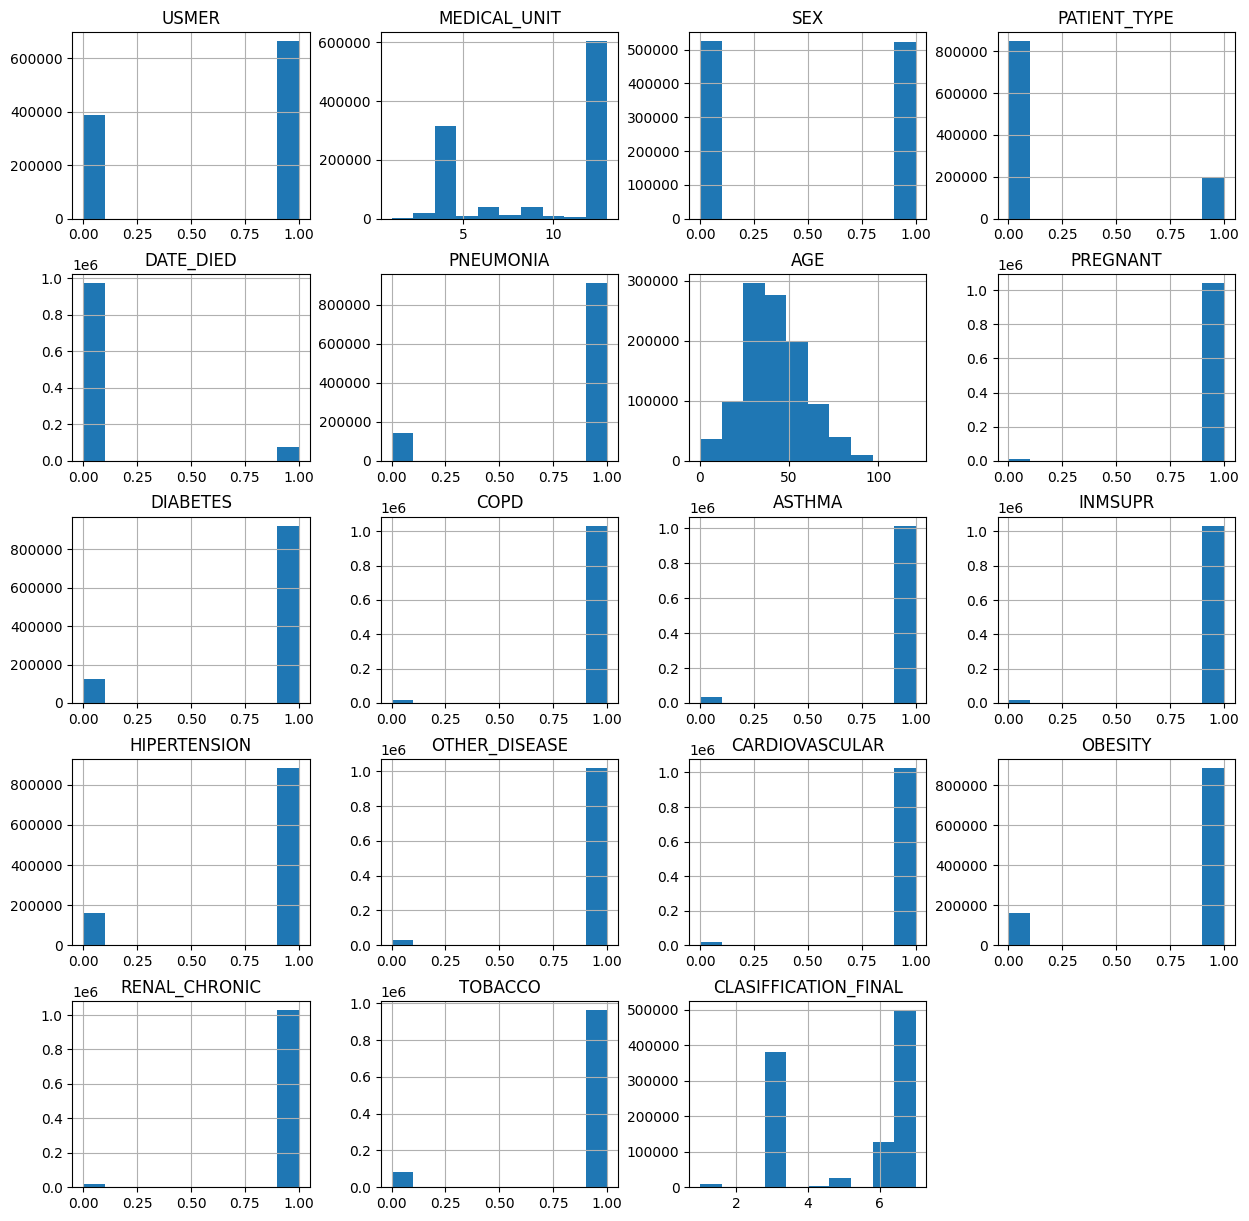

In [ ]:
# Show data distribution in each feature
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.show()

#### The AGE COLUMN needs to be scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

def scaling(data):
    scaler = StandardScaler()
    data['AGE'] = scaler.fit_transform(data.loc[:,['AGE']])
    return data

df = scaling(df)
df.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,0,0,1,0,1.376147,1,1,1,1,1,0,1,1,1,1,1,3
1,1,1,1,0,1,0,1.790918,1,1,1,1,1,0,1,1,0,0,1,5
2,1,1,1,1,1,1,0.783617,1,0,1,1,1,1,1,1,1,1,1,3
3,1,1,0,0,1,1,0.665111,1,1,1,1,1,1,1,1,1,1,1,7
4,1,1,1,0,1,1,1.553906,1,0,1,1,1,0,1,1,1,1,1,3
5,1,1,0,1,0,0,-0.105178,1,1,1,1,1,1,1,1,1,1,1,3
6,1,1,0,0,0,1,1.316894,1,1,1,1,1,1,1,1,1,1,1,3
7,1,1,0,0,0,0,1.316894,1,0,1,1,0,0,1,1,1,0,1,3
8,1,1,0,1,0,1,-0.282937,1,0,1,1,1,0,1,1,0,1,1,3
9,1,1,0,1,0,1,-0.993973,1,1,1,1,1,1,1,1,1,1,1,3


#### The CLASSIFICATION_FINAL COLUMN needs to be scaled

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scaling(data):
    scaler = StandardScaler()
    data['CLASIFFICATION_FINAL'] = scaler.fit_transform(data[['CLASIFFICATION_FINAL']])
    return data

df = scaling(df)
df.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,0,0,1,0,1.376147,1,1,1,1,1,0,1,1,1,1,1,-1.225652
1,1,1,1,0,1,0,1.790918,1,1,1,1,1,0,1,1,0,0,1,-0.162481
2,1,1,1,1,1,1,0.783617,1,0,1,1,1,1,1,1,1,1,1,-1.225652
3,1,1,0,0,1,1,0.665111,1,1,1,1,1,1,1,1,1,1,1,0.900691
4,1,1,1,0,1,1,1.553906,1,0,1,1,1,0,1,1,1,1,1,-1.225652
5,1,1,0,1,0,0,-0.105178,1,1,1,1,1,1,1,1,1,1,1,-1.225652
6,1,1,0,0,0,1,1.316894,1,1,1,1,1,1,1,1,1,1,1,-1.225652
7,1,1,0,0,0,0,1.316894,1,0,1,1,0,0,1,1,1,0,1,-1.225652
8,1,1,0,1,0,1,-0.282937,1,0,1,1,1,0,1,1,0,1,1,-1.225652
9,1,1,0,1,0,1,-0.993973,1,1,1,1,1,1,1,1,1,1,1,-1.225652


#### The MEDICAL_UNIT Column needs to be encoded

In [ ]:
from sklearn.preprocessing import LabelEncoder

def scaling(data):
    encoder = LabelEncoder()
    data['MEDICAL_UNIT'] = encoder.fit_transform(data['MEDICAL_UNIT'])
    return data

df = scaling(df)
df.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,0,0,0,1,0,1.376147,1,1,1,1,1,0,1,1,1,1,1,-1.225652
1,1,0,1,0,1,0,1.790918,1,1,1,1,1,0,1,1,0,0,1,-0.162481
2,1,0,1,1,1,1,0.783617,1,0,1,1,1,1,1,1,1,1,1,-1.225652
3,1,0,0,0,1,1,0.665111,1,1,1,1,1,1,1,1,1,1,1,0.900691
4,1,0,1,0,1,1,1.553906,1,0,1,1,1,0,1,1,1,1,1,-1.225652
5,1,0,0,1,0,0,-0.105178,1,1,1,1,1,1,1,1,1,1,1,-1.225652
6,1,0,0,0,0,1,1.316894,1,1,1,1,1,1,1,1,1,1,1,-1.225652
7,1,0,0,0,0,0,1.316894,1,0,1,1,0,0,1,1,1,0,1,-1.225652
8,1,0,0,1,0,1,-0.282937,1,0,1,1,1,0,1,1,0,1,1,-1.225652
9,1,0,0,1,0,1,-0.993973,1,1,1,1,1,1,1,1,1,1,1,-1.225652


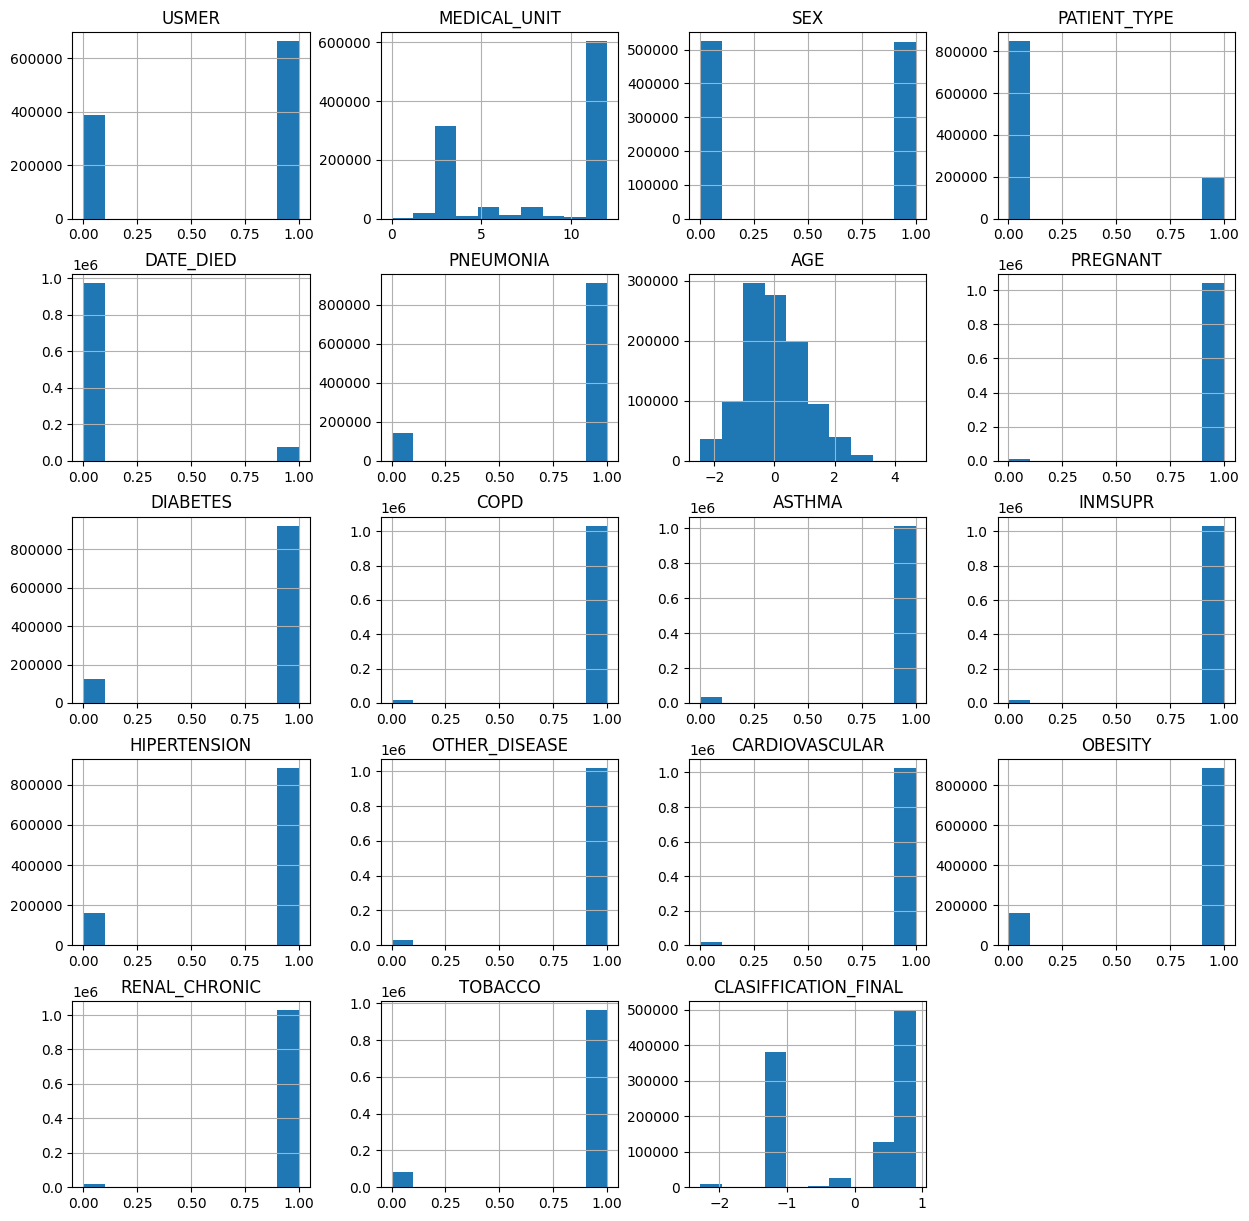

In [ ]:
# Show data distribution in each feature after feature scaling
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.show()

### Splitting the dataset into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('DATE_DIED', axis = 1)
y = df['DATE_DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Handling class imbalance

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Display class distribution
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Original class distribution: Counter({0: 777158, 1: 61702})
Resampled class distribution: Counter({0: 61702, 1: 61702})


Distribution of the dependent variable after undersampling: 
DATE_DIED
0    61702
1    61702
Name: count, dtype: int64


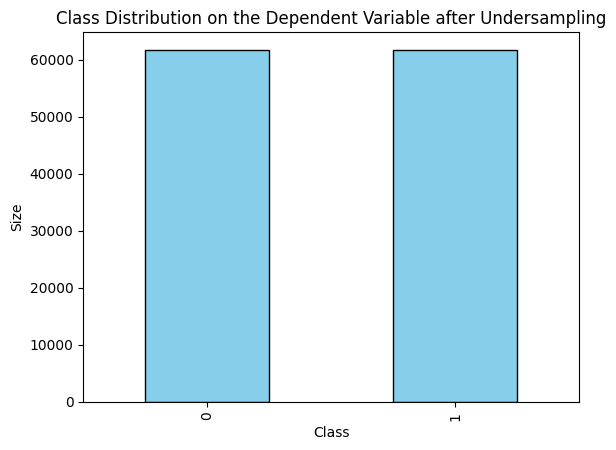

In [ ]:
import matplotlib.pyplot as plt

# Check for class imbalance
class_distribution = y_train_resampled.value_counts()

print("Distribution of the dependent variable after undersampling: ")
print(class_distribution)

# Diagram
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution on the Dependent Variable after Undersampling")
plt.xlabel("Class")
plt.ylabel("Size")
plt.show()

### Dimensionality Reduction with PCA

Original shape: (123404, 18)
Reduced shape: (123404, 6)


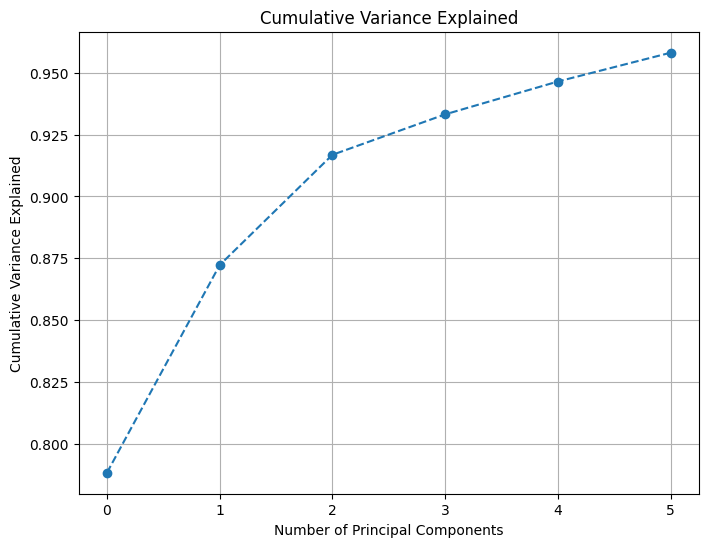

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_train_resampled)

# X_train before and after PCA
print("Original shape:", X_train_resampled.shape)
print("Reduced shape:", X_pca.shape)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()


# Model Training (Each model includes Hyperparameter optimization using RandomizedSearchCV for faster results)

### Helpers



In [ ]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
# Function that returns metrics for a specific model
def calculate_metrics(model, y_pred_this, y_pred_roc_auc_this):
    accuracy = accuracy_score(y_test, y_pred_this)
    precision = precision_score(y_test, y_pred_this)
    recall = recall_score(y_test, y_pred_this)
    f1 = f1_score(y_test, y_pred_this)
    roc_auc = roc_auc_score(y_test, y_pred_roc_auc_this)
    conf_matrix = confusion_matrix(y_test, y_pred_this)
    return accuracy, precision, recall, f1, roc_auc, conf_matrix

In [ ]:
# Stratified K-Fold that will be used in RandomizedSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average= None)

In [ ]:
# Function that extracts scores in each fold (Data are used in the statistical testing)
def evaluate_model_with_folds_pca(model, X_train_resampled, y_train_resampled, X_test, y_test, pca, n_splits=5):
    """
    Perform cross-validation on the resampled training set (after PCA) and compute metrics for each fold,
    including metrics on the overall PCA-transformed test set.

    Parameters:
    - model: Initialized machine learning model with best hyperparameters.
    - X_train_resampled: Resampled training features (NumPy array or pandas DataFrame).
    - y_train_resampled: Resampled training labels (NumPy array or pandas Series).
    - X_test: Original test features (NumPy array or pandas DataFrame).
    - y_test: Original test labels (NumPy array or pandas Series).
    - pca: Fitted PCA object to transform the data.
    - n_splits: Number of folds for Stratified K-Fold cross-validation (default: 5).

    Returns:
    - metrics_df: DataFrame containing accuracy, precision, recall, F1-score, and ROC-AUC
      for train, validation, and test sets in each fold.
    """

    # Apply PCA to the test set using the fitted PCA object
    X_test_pca = pca.transform(X_test)

    # Convert to NumPy arrays if not already
    if isinstance(X_train_resampled, pd.DataFrame):
        X_train_resampled = X_train_resampled.to_numpy()
    if isinstance(y_train_resampled, pd.Series):
        y_train_resampled = y_train_resampled.to_numpy()
    y_train_resampled = y_train_resampled.ravel()  # Ensure y_train is 1D

    # Ensure y_test is a 1D array
    if len(y_test.shape) > 1 and y_test.shape[1] == 1:
        y_test = y_test.ravel()
    y_test = y_test.astype(int)

    # Initialize Stratified K-Fold
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # List to store metrics for each fold
    metrics_data = []

    # Loop through each fold
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_resampled, y_train_resampled)):
        # Apply PCA to the current fold's train and validation sets
        X_train_fold_pca = pca.transform(X_train_resampled[train_idx])
        X_val_fold_pca = pca.transform(X_train_resampled[val_idx])
        y_train_fold, y_val_fold = y_train_resampled[train_idx], y_train_resampled[val_idx]

        # Train the model on the current fold's PCA-transformed training set
        model.fit(X_train_fold_pca, y_train_fold)

        # Predict on train, validation, and overall test sets
        y_train_pred = model.predict(X_train_fold_pca)
        y_val_pred = model.predict(X_val_fold_pca)
        y_test_pred = model.predict(X_test_pca)

        # Predict probabilities for ROC AUC
        y_train_proba = model.predict_proba(X_train_fold_pca)[:, 1]
        y_val_proba = model.predict_proba(X_val_fold_pca)[:, 1]
        y_test_proba = model.predict_proba(X_test_pca)[:, 1]

        # Compute metrics for the train set
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        train_precision = precision_score(y_train_fold, y_train_pred)
        train_recall = recall_score(y_train_fold, y_train_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        train_roc_auc = roc_auc_score(y_train_fold, y_train_proba)

        # Compute metrics for the validation set
        val_accuracy = accuracy_score(y_val_fold, y_val_pred)
        val_precision = precision_score(y_val_fold, y_val_pred)
        val_recall = recall_score(y_val_fold, y_val_pred)
        val_f1 = f1_score(y_val_fold, y_val_pred)
        val_roc_auc = roc_auc_score(y_val_fold, y_val_proba)

        # Compute metrics for the overall PCA-transformed test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_roc_auc = roc_auc_score(y_test, y_test_proba)

        # Store metrics for the current fold
        metrics_data.append({
            'Fold': fold + 1,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1-Score': train_f1,
            'Train ROC-AUC': train_roc_auc,
            'Validation Accuracy': val_accuracy,
            'Validation Precision': val_precision,
            'Validation Recall': val_recall,
            'Validation F1-Score': val_f1,
            'Validation ROC-AUC': val_roc_auc,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1-Score': test_f1,
            'Test ROC-AUC': test_roc_auc
        })

    # Convert the list of metrics to a pandas DataFrame
    metrics_df = pd.DataFrame(metrics_data)

    return metrics_df


### KNN

#### Hyperparameter Optimization

In [ ]:
# Parameters that will be tested in RandomizedSearch
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Model
knn = KNeighborsClassifier()

# Executing RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Training and extracting results
random_search.fit(X_pca, y_train_resampled)

print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

# Results
# Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 27, 'metric': 'manhattan'}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 27, 'metric': 'manhattan'}
Best F1-Score: 0.9132576994033226


#### Extract scores from each fold

In [ ]:
# Train the model with the best parameters found
best_knn = KNeighborsClassifier(
    n_neighbors=27,
    weights='uniform',
    metric='manhattan',
    p=1
)

# Getting scores from each fold
knn_metrics_df = evaluate_model_with_folds_pca(
    model=best_knn,
    X_train_resampled=X_train_resampled,
    y_train_resampled=y_train_resampled,
    X_test=X_test,
    y_test=y_test,
    pca=pca,
    n_splits=5
)

# Display the metrics DataFrame
print(knn_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

   Fold  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0     1        0.912898         0.883046      0.951866        0.916165   
1     2        0.911976         0.882284      0.950812        0.915267   
2     3        0.912827         0.882770      0.952088        0.916119   
3     4        0.912958         0.882525      0.952736        0.916288   
4     5        0.912726         0.882850      0.951744        0.916004   

   Train ROC-AUC  Validation Accuracy  Validation Precision  \
0       0.965218             0.907783              0.876929   
1       0.964608             0.912483              0.883341   
2       0.965232             0.910093              0.880641   
3       0.964760             0.908472              0.878567   
4       0.964995             0.910413              0.880818   

   Validation Recall  Validation F1-Score  Validation ROC-AUC  Test Accuracy  \
0           0.948703             0.911405            0.951003       0.874878   
1           0.95

#### Model training

In [ ]:
# Fit the model with the best parameters on the training set
best_knn.fit(X_pca, y_train_resampled)

# Predict on the test set
X_test_pca = pca.transform(X_test)
y_pred = best_knn.predict(X_test_pca)
y_pred_roc_auc = best_knn.predict_proba(X_test_pca)[:, 1]

# Calculate the performance metrics
accuracy, precision, recall, f1, roc_auc, conf_matrix = calculate_metrics(best_knn, y_pred, y_pred_roc_auc)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Print the classification
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8756169086617552
Precision: 0.3637802396563419
Recall: 0.9501968503937008
F1-Score: 0.5261322142896071
ROC AUC: 0.9521885433188959
Confusion Matrix:
 [[169149  25326]
 [   759  14481]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    194475
           1       0.36      0.95      0.53     15240

    accuracy                           0.88    209715
   macro avg       0.68      0.91      0.73    209715
weighted avg       0.95      0.88      0.90    209715



### Logistic Regression

#### Hyperparameter Optimization

In [ ]:
# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# RandomizedSearchCV
random_search_log_reg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search
random_search_log_reg.fit(X_pca, y_train_resampled)

# Print best hyperparameters and F1 score
print("Best Parameters:", random_search_log_reg.best_params_)
print("Best F1-Score:", random_search_log_reg.best_score_)

# Results
# Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
# Best F1-Score: 0.9034508118283135

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best F1-Score: 0.8960111630559296


#### Extract Scores from each fold

In [ ]:
# Train the model with the best parameters found
best_log_reg = LogisticRegression(
    C=1,
    penalty='l2',
    solver='liblinear',
    random_state=42
)

# Assuming 'pca' is already fitted on X_train_resampled
log_reg_metrics_df = evaluate_model_with_folds_pca(
    model=best_log_reg,
    X_train_resampled=X_train_resampled,
    y_train_resampled=y_train_resampled,
    X_test=X_test,
    y_test=y_test,
    pca=pca,
    n_splits=5
)

# Display the metrics DataFrame
print(log_reg_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

   Fold  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0     1        0.895040         0.887674      0.904542        0.896029   
1     2        0.894290         0.886754      0.904035        0.895311   
2     3        0.894878         0.886928      0.905148        0.895945   
3     4        0.895019         0.887421      0.904824        0.896038   
4     5        0.894706         0.887508      0.903995        0.895675   

   Train ROC-AUC  Validation Accuracy  Validation Precision  \
0       0.947713             0.893845              0.884920   
1       0.947244             0.897087              0.889631   
2       0.947630             0.894251              0.889084   
3       0.947711             0.894453              0.887025   
4       0.947619             0.895340              0.886477   

   Validation Recall  Validation F1-Score  Validation ROC-AUC  Test Accuracy  \
0           0.905429             0.895057            0.947014       0.884400   
1           0.90

#### Model training

In [ ]:
# Fit the model with the best parameters on the training set
best_log_reg.fit(X_pca, y_train_resampled)

# Predict on the test set
X_test_pca = pca.transform(X_test)
y_pred = best_log_reg.predict(X_test_pca)
y_pred_roc_auc = best_log_reg.predict_proba(X_test_pca)[:, 1]

# Evaluate metrics
accuracy, precision, recall, f1, roc_auc, conf_matrix = calculate_metrics(best_log_reg, y_pred, y_pred_roc_auc)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.884643444674916
Precision: 0.37759789980310654
Recall: 0.9060367454068241
F1-Score: 0.5330450895614577
ROC AUC: 0.9472647500724577
Confusion Matrix:
 [[171715  22760]
 [  1432  13808]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93    194475
           1       0.38      0.91      0.53     15240

    accuracy                           0.88    209715
   macro avg       0.68      0.89      0.73    209715
weighted avg       0.95      0.88      0.91    209715



### Random Forest

#### Hyperparameter Optimization

In [ ]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search
random_search.fit(X_pca, y_train_resampled)

# Print best hyperparameters and F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

# Results
# Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
# Best F1-Score: 0.9099735870404576



Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best F1-Score: 0.9117386948519919


#### Extract scores from each fold

In [ ]:
# Train the model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=10,
    bootstrap=False,
    random_state=42
)

# Assuming 'pca' is already fitted on X_train_resampled
rf_metrics_df = evaluate_model_with_folds_pca(
    model=best_rf,
    X_train_resampled=X_train_resampled,
    y_train_resampled=y_train_resampled,
    X_test=X_test,
    y_test=y_test,
    pca=pca,
    n_splits=5
)

# Display the metrics DataFrame
print(rf_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

   Fold  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0     1        0.920110         0.889122      0.959929        0.923170   
1     2        0.919431         0.887803      0.960212        0.922589   
2     3        0.920019         0.888766      0.960212        0.923108   
3     4        0.920171         0.888520      0.960900        0.923294   
4     5        0.920141         0.888924      0.960273        0.923222   

   Train ROC-AUC  Validation Accuracy  Validation Precision  \
0       0.965259             0.906406              0.874254   
1       0.964795             0.911146              0.880865   
2       0.965552             0.907702              0.878735   
3       0.964976             0.907257              0.876988   
4       0.965223             0.908387              0.877802   

   Validation Recall  Validation F1-Score  Validation ROC-AUC  Test Accuracy  \
0           0.949352             0.910256            0.955618       0.872017   
1           0.95

#### Model Training

In [ ]:
# Fit the model with the best parameters on the training set
best_rf.fit(X_pca, y_train_resampled)

# Predict on the test set
X_test_pca = pca.transform(X_test)
y_pred = best_rf.predict(X_test_pca)
y_pred_roc_auc = best_rf.predict_proba(X_test_pca)[:, 1]

# Evaluate metrics
accuracy, precision, recall, f1, roc_auc, conf_matrix = calculate_metrics(best_rf, y_pred, y_pred_roc_auc)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8715351786948955
Precision: 0.3561293495635067
Recall: 0.950262467191601
F1-Score: 0.5180931938109292
ROC AUC: 0.9554919910223332
Confusion Matrix:
 [[168292  26183]
 [   758  14482]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    194475
           1       0.36      0.95      0.52     15240

    accuracy                           0.87    209715
   macro avg       0.68      0.91      0.72    209715
weighted avg       0.95      0.87      0.90    209715



### CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

#### Hyperparameter Optimization

In [ ]:
# Parameter Grid
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

# Initialize Model
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit Model
random_search.fit(X_pca, y_train_resampled)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

# Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 200, 'depth': 10, 'border_count': 128}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 200, 'depth': 10, 'border_count': 128}
Best F1-Score: 0.9144361210870791


#### Extract scores from each fold

In [ ]:
# Train the model with the best parameters
best_catboost = CatBoostClassifier(
    learning_rate=0.1,
    l2_leaf_reg=5,
    iterations=200,
    depth=10,
    border_count=128,
    random_state=42
)

# Assuming 'pca' is already fitted on X_train_resampled
catboost_metrics_df = evaluate_model_with_folds_pca(
    model=best_catboost,
    X_train_resampled=X_train_resampled,
    y_train_resampled=y_train_resampled,
    X_test=X_test,
    y_test=y_test,
    pca=pca,
    n_splits=5
)

# Display the metrics DataFrame
print(catboost_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0:	learn: 0.5817177	total: 23ms	remaining: 4.58s
1:	learn: 0.4984605	total: 43.3ms	remaining: 4.29s
2:	learn: 0.4416236	total: 62.9ms	remaining: 4.13s
3:	learn: 0.3967783	total: 83.1ms	remaining: 4.07s
4:	learn: 0.3652462	total: 104ms	remaining: 4.05s
5:	learn: 0.3411385	total: 126ms	remaining: 4.06s
6:	learn: 0.3234646	total: 145ms	remaining: 4.01s
7:	learn: 0.3093274	total: 167ms	remaining: 4s
8:	learn: 0.2980223	total: 188ms	remaining: 3.98s
9:	learn: 0.2904326	total: 207ms	remaining: 3.93s
10:	learn: 0.2834437	total: 228ms	remaining: 3.91s
11:	learn: 0.2773094	total: 249ms	remaining: 3.9s
12:	learn: 0.2724071	total: 268ms	remaining: 3.86s
13:	learn: 0.2686107	total: 288ms	remaining: 3.83s
14:	learn: 0.2652965	total: 308ms	remaining: 3.8s
15:	learn: 0.2625726	total: 328ms	remaining: 3.77s
16:	learn: 0.2596425	total: 349ms	remaining: 3.76s
17:	learn: 0.2574985	total: 370ms	remaining: 3.74s
18:	learn: 0.2554545	total: 392ms	remaining: 3.74s
19:	learn: 0.2539298	total: 416ms	remaining:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0:	learn: 0.5810505	total: 20.9ms	remaining: 4.16s
1:	learn: 0.5033668	total: 39.9ms	remaining: 3.95s
2:	learn: 0.4429657	total: 59.8ms	remaining: 3.92s
3:	learn: 0.3987286	total: 79.2ms	remaining: 3.88s
4:	learn: 0.3680504	total: 98ms	remaining: 3.82s
5:	learn: 0.3432916	total: 117ms	remaining: 3.77s
6:	learn: 0.3246444	total: 135ms	remaining: 3.73s
7:	learn: 0.3111304	total: 154ms	remaining: 3.7s
8:	learn: 0.2995529	total: 174ms	remaining: 3.69s
9:	learn: 0.2902819	total: 192ms	remaining: 3.65s
10:	learn: 0.2840384	total: 211ms	remaining: 3.62s
11:	learn: 0.2782575	total: 230ms	remaining: 3.6s
12:	learn: 0.2733729	total: 249ms	remaining: 3.59s
13:	learn: 0.2689904	total: 268ms	remaining: 3.56s
14:	learn: 0.2658569	total: 286ms	remaining: 3.53s
15:	learn: 0.2635884	total: 305ms	remaining: 3.5s
16:	learn: 0.2614455	total: 324ms	remaining: 3.48s
17:	learn: 0.2593471	total: 343ms	remaining: 3.46s
18:	learn: 0.2573455	total: 361ms	remaining: 3.44s
19:	learn: 0.2556036	total: 381ms	remaini

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0:	learn: 0.5806807	total: 19.6ms	remaining: 3.91s
1:	learn: 0.5042084	total: 39.5ms	remaining: 3.91s
2:	learn: 0.4443077	total: 59.1ms	remaining: 3.88s
3:	learn: 0.4005537	total: 77.7ms	remaining: 3.81s
4:	learn: 0.3684209	total: 96.7ms	remaining: 3.77s
5:	learn: 0.3432343	total: 116ms	remaining: 3.75s
6:	learn: 0.3254402	total: 135ms	remaining: 3.73s
7:	learn: 0.3108612	total: 155ms	remaining: 3.71s
8:	learn: 0.2986746	total: 176ms	remaining: 3.73s
9:	learn: 0.2900745	total: 196ms	remaining: 3.72s
10:	learn: 0.2824337	total: 216ms	remaining: 3.7s
11:	learn: 0.2766351	total: 236ms	remaining: 3.7s
12:	learn: 0.2723322	total: 256ms	remaining: 3.68s
13:	learn: 0.2683317	total: 275ms	remaining: 3.65s
14:	learn: 0.2648100	total: 294ms	remaining: 3.63s
15:	learn: 0.2621532	total: 314ms	remaining: 3.61s
16:	learn: 0.2594581	total: 334ms	remaining: 3.6s
17:	learn: 0.2572325	total: 354ms	remaining: 3.58s
18:	learn: 0.2557194	total: 373ms	remaining: 3.56s
19:	learn: 0.2541489	total: 392ms	remai

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0:	learn: 0.5815205	total: 19.2ms	remaining: 3.82s
1:	learn: 0.5009612	total: 38.2ms	remaining: 3.78s
2:	learn: 0.4436516	total: 56.5ms	remaining: 3.71s
3:	learn: 0.4022786	total: 75.3ms	remaining: 3.69s
4:	learn: 0.3688129	total: 93.5ms	remaining: 3.65s
5:	learn: 0.3438669	total: 111ms	remaining: 3.6s
6:	learn: 0.3254574	total: 130ms	remaining: 3.59s
7:	learn: 0.3113528	total: 148ms	remaining: 3.56s
8:	learn: 0.2999855	total: 167ms	remaining: 3.54s
9:	learn: 0.2902418	total: 185ms	remaining: 3.52s
10:	learn: 0.2830195	total: 205ms	remaining: 3.52s
11:	learn: 0.2774023	total: 224ms	remaining: 3.52s
12:	learn: 0.2727212	total: 244ms	remaining: 3.51s
13:	learn: 0.2688866	total: 263ms	remaining: 3.49s
14:	learn: 0.2652478	total: 281ms	remaining: 3.47s
15:	learn: 0.2625022	total: 300ms	remaining: 3.45s
16:	learn: 0.2596315	total: 320ms	remaining: 3.45s
17:	learn: 0.2573728	total: 339ms	remaining: 3.43s
18:	learn: 0.2555356	total: 358ms	remaining: 3.4s
19:	learn: 0.2537404	total: 377ms	rema

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0:	learn: 0.5823319	total: 20.1ms	remaining: 3.99s
1:	learn: 0.5022961	total: 39.5ms	remaining: 3.91s
2:	learn: 0.4412429	total: 58ms	remaining: 3.81s
3:	learn: 0.3989480	total: 76.7ms	remaining: 3.75s
4:	learn: 0.3665737	total: 96ms	remaining: 3.75s
5:	learn: 0.3416472	total: 115ms	remaining: 3.71s
6:	learn: 0.3248848	total: 134ms	remaining: 3.69s
7:	learn: 0.3105108	total: 155ms	remaining: 3.71s
8:	learn: 0.2994267	total: 177ms	remaining: 3.75s
9:	learn: 0.2899933	total: 197ms	remaining: 3.75s
10:	learn: 0.2836485	total: 218ms	remaining: 3.74s
11:	learn: 0.2777296	total: 240ms	remaining: 3.75s
12:	learn: 0.2728657	total: 261ms	remaining: 3.75s
13:	learn: 0.2693760	total: 281ms	remaining: 3.73s
14:	learn: 0.2654783	total: 301ms	remaining: 3.71s
15:	learn: 0.2630332	total: 321ms	remaining: 3.69s
16:	learn: 0.2603643	total: 342ms	remaining: 3.68s
17:	learn: 0.2581812	total: 362ms	remaining: 3.65s
18:	learn: 0.2565774	total: 381ms	remaining: 3.63s
19:	learn: 0.2546504	total: 400ms	remain

#### Model Training

In [ ]:
# Fit the model with the best parameters on the training set
best_catboost.fit(X_pca, y_train_resampled)

# Predict on the test set
X_test_pca = pca.transform(X_test)
y_pred = best_catboost.predict(X_test_pca)
y_pred_roc_auc = best_catboost.predict_proba(X_test_pca)[:, 1]

# Evaluate metrics
accuracy, precision, recall, f1, roc_auc, conf_matrix = calculate_metrics(best_rf, y_pred, y_pred_roc_auc)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

0:	learn: 0.5784185	total: 20.8ms	remaining: 4.13s
1:	learn: 0.4982012	total: 41ms	remaining: 4.06s
2:	learn: 0.4404834	total: 61.7ms	remaining: 4.05s
3:	learn: 0.3975499	total: 82.7ms	remaining: 4.05s
4:	learn: 0.3656139	total: 103ms	remaining: 4.01s
5:	learn: 0.3429430	total: 123ms	remaining: 3.98s
6:	learn: 0.3248717	total: 146ms	remaining: 4.01s
7:	learn: 0.3116790	total: 166ms	remaining: 3.98s
8:	learn: 0.3000783	total: 188ms	remaining: 3.98s
9:	learn: 0.2917493	total: 209ms	remaining: 3.96s
10:	learn: 0.2845454	total: 230ms	remaining: 3.96s
11:	learn: 0.2792682	total: 251ms	remaining: 3.94s
12:	learn: 0.2746638	total: 271ms	remaining: 3.9s
13:	learn: 0.2707560	total: 293ms	remaining: 3.89s
14:	learn: 0.2674634	total: 313ms	remaining: 3.87s
15:	learn: 0.2644634	total: 335ms	remaining: 3.85s
16:	learn: 0.2616070	total: 358ms	remaining: 3.85s
17:	learn: 0.2596406	total: 379ms	remaining: 3.83s
18:	learn: 0.2576043	total: 400ms	remaining: 3.81s
19:	learn: 0.2561496	total: 421ms	remain

### LightGBM

#### Hyperparameter Optimization

In [ ]:
# Hyperparameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search
random_search.fit(X_pca, y_train_resampled)

# Print best hyperparameters and F1 score
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

# Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
# Best F1-Score: 0.9109623203900264

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61702, number of negative: 61702
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 123404, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best F1-Score: 0.9140462966322843


#### Extract scores from each fold

In [ ]:
# Train the model with the best parameters
best_lgb = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=-1,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

# Assuming 'pca' is already fitted on X_train_resampled
lgb_metrics_df = evaluate_model_with_folds_pca(
    model=best_lgb,
    X_train_resampled=X_train_resampled,
    y_train_resampled=y_train_resampled,
    X_test=X_test,
    y_test=y_test,
    pca=pca,
    n_splits=5
)

# Display the metrics DataFrame
print(lgb_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 49362, number of negative: 49361
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 98723, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500005 -> initscore=0.000020
[LightGBM] [Info] Start training from score 0.000020


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[LightGBM] [Info] Number of positive: 49362, number of negative: 49361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 98723, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500005 -> initscore=0.000020
[LightGBM] [Info] Start training from score 0.000020


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[LightGBM] [Info] Number of positive: 49361, number of negative: 49362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 98723, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000020
[LightGBM] [Info] Start training from score -0.000020


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[LightGBM] [Info] Number of positive: 49361, number of negative: 49362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 98723, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000020
[LightGBM] [Info] Start training from score -0.000020


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[LightGBM] [Info] Number of positive: 49362, number of negative: 49362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 98724, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

   Fold  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0     1        0.917557         0.888157      0.955431        0.920566   
1     2        0.916960         0.887696      0.954702        0.919980   
2     3        0.916858         0.888038      0.953992        0.919834   
3     4        0.916960         0.887504      0.954964        0.919999   
4     5        0.917031         0.887813      0.954702        0.920043   

   Train ROC-AUC  Validation Accuracy  Validation Precision  \
0       0.965075             0.909323              0.878579   
1       0.964860             0.913942              0.886267   
2       0.965513             0.909039              0.881730   
3       0.965101             0.911187              0.882433   
4       0.965286             0.910454              0.882033   

   Validation Recall  Validation F1-Score  Validation ROC-AUC  Test Accuracy  \
0           0.949919             0.912857            0.957322       0.877744   
1           0.94

#### Model Training

In [ ]:
# Fit the model with the best parameters on the training set
best_lgb.fit(X_pca, y_train_resampled)

# Predict on the test set
X_test_pca = pca.transform(X_test)
y_pred = best_lgb.predict(X_test_pca)
y_pred_roc_auc = best_lgb.predict_proba(X_test_pca)[:, 1]

# Evaluate metrics
accuracy, precision, recall, f1, roc_auc, conf_matrix = calculate_metrics(best_rf, y_pred, y_pred_roc_auc)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61702, number of negative: 61702
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 123404, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.8777960565529409
Precision: 0.36804532290025915
Recall: 0.9505905511811024
F1-Score: 0.5306399033002455
ROC AUC: 0.957287679596356
Confusion Matrix:
 [[169600  24875]
 [   753  14487]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    194475
           1       0.37      0.95      0.53     15240

    accuracy                           0.88    209715
   macro avg       0.68      0.91      0.73    209715
weighted avg       0.95      0.88      0.90    209715



In [ ]:
print(X_pca.shape)

(123404, 6)


### Decision Trees

#### Hyperparameter Optimzation

In [ ]:
# Hyperparameter grid for Decision Trees
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'], # Splitting criteria
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_pca, y_train_resampled)

# Best Parameters
print("Best Parameters:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

# Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'log_loss'}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'log_loss'}
Best F1-Score: 0.9070328298327697


#### Extract scores from each fold

In [ ]:
# Train the model with the best parameters
best_dt = DecisionTreeClassifier(
    criterion='log_loss',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Assuming 'pca' is already fitted on X_train_resampled
dt_metrics_df = evaluate_model_with_folds_pca(
    model=best_dt,
    X_train_resampled=X_train_resampled,
    y_train_resampled=y_train_resampled,
    X_test=X_test,
    y_test=y_test,
    pca=pca,
    n_splits=5
)

# Display the metrics DataFrame
print(dt_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

   Fold  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0     1        0.913880         0.883878      0.952960        0.917120   
1     2        0.913495         0.884634      0.951015        0.916624   
2     3        0.914012         0.885367      0.951176        0.917092   
3     4        0.914032         0.880946      0.957456        0.917609   
4     5        0.913587         0.883483      0.952838        0.916851   

   Train ROC-AUC  Validation Accuracy  Validation Precision  \
0       0.962072             0.901949              0.872149   
1       0.961684             0.905069              0.876705   
2       0.962187             0.901625              0.874726   
3       0.962240             0.901989              0.870003   
4       0.962032             0.903160              0.874680   

   Validation Recall  Validation F1-Score  Validation ROC-AUC  Test Accuracy  \
0           0.941977             0.905719            0.946620       0.868507   
1           0.94

#### Model Training

In [ ]:
# Fit the model with the best parameters on the training set
best_dt.fit(X_pca, y_train_resampled)

# Predict and Evaluate
X_test_pca = pca.transform(X_test)
y_pred = best_dt.predict(X_test_pca)
y_prob = best_dt.predict_proba(X_test_pca)[:, 1]

# Evaluate metrics
accuracy, precision, recall, f1, roc_auc, conf_matrix = calculate_metrics(best_rf, y_pred, y_pred_roc_auc)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8648165367284172
Precision: 0.3440919037199125
Recall: 0.9492782152230971
F1-Score: 0.505097409398785
ROC AUC: 0.957287679596356
Confusion Matrix:
 [[166898  27577]
 [   773  14467]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92    194475
           1       0.34      0.95      0.51     15240

    accuracy                           0.86    209715
   macro avg       0.67      0.90      0.71    209715
weighted avg       0.95      0.86      0.89    209715



# Model Evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score

# Initialize the DataFrame
metrics_data = []

# Ensure y_test is 1D (convert from one-hot if needed)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Check if y_test is one-hot encoded
    y_test = np.argmax(y_test, axis=1)

# Function to evaluate a model and collect metrics
def evaluate_model(model, model_name, train_or_test, balanced_or_unbalanced, X_train, y_train, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test_pca)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # ROC AUC calculation
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_pca)[:, 1])

    # Append metrics to the list
    metrics_data.append({
        "Classifier Name": model_name,
        "Training or Test Set": train_or_test,
        "Balanced or Unbalanced Train Set": balanced_or_unbalanced,
        "Number of Training Samples": len(y_train),
        "Number of People who Died from COVID in Training Sample": sum(y_train == 1),  # Positive class count
        "True Positives (TP)": tp,
        "True Negatives (TN)": tn,
        "False Positives (FP)": fp,
        "False Negatives (FN)": fn,
        "ROC-AUC": roc_auc
    })

# Evaluate each model
models = {
    "KNN": best_knn,
    "Logistic Regression": best_log_reg,
    "Random Forest": best_rf,
    "CatBoost": best_catboost,
    "LightGBM": best_lgb,
    "Decision Trees": best_dt
}

for model_name, model in models.items():
    evaluate_model(model, model_name, "test", "imbalanced", X_train, y_train, X_test, y_test)

# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print(metrics_df)

# Save to a CSV file if needed
metrics_df.to_csv("model_evaluation_metrics.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


       Classifier Name Training or Test Set Balanced or Unbalanced Train Set  \
0                  KNN                 test                       imbalanced   
1  Logistic Regression                 test                       imbalanced   
2        Random Forest                 test                       imbalanced   
3             CatBoost                 test                       imbalanced   
4             LightGBM                 test                       imbalanced   
5       Decision Trees                 test                       imbalanced   

   Number of Training Samples  \
0                      838860   
1                      838860   
2                      838860   
3                      838860   
4                      838860   
5                      838860   

   Number of People who Died from COVID in Training Sample  \
0                                              61702         
1                                              61702         
2                    

# Anova Statistical Test

In [ ]:
import pandas as pd

# Each DataFrame should have columns: 'Fold', 'Train F1-Score', 'Test F1-Score'
log_reg_metrics_df['Model'] = 'Logistic Regression'
knn_metrics_df['Model'] = 'KNN'
rf_metrics_df['Model'] = 'Random Forest'
catboost_metrics_df['Model'] = 'CatBoost'
lgb_metrics_df['Model'] = 'LightGBM'
dt_metrics_df['Model'] = 'Decision Tree'

# Concatenate all DataFrames
all_metrics_df = pd.concat([
    log_reg_metrics_df[['Fold', 'Model', 'Train F1-Score', 'Test F1-Score']],
    knn_metrics_df[['Fold', 'Model', 'Train F1-Score', 'Test F1-Score']],
    rf_metrics_df[['Fold', 'Model', 'Train F1-Score', 'Test F1-Score']],
    catboost_metrics_df[['Fold', 'Model', 'Train F1-Score', 'Test F1-Score']],
    lgb_metrics_df[['Fold', 'Model', 'Train F1-Score', 'Test F1-Score']],
    dt_metrics_df[['Fold', 'Model', 'Train F1-Score', 'Test F1-Score']]
], axis=0)


In [ ]:
from scipy.stats import f_oneway

# Group F1-scores by model
train_f1_scores = [group['Train F1-Score'].values for name, group in all_metrics_df.groupby('Model')]
test_f1_scores = [group['Test F1-Score'].values for name, group in all_metrics_df.groupby('Model')]

# Perform ANOVA on train F1-scores
f_stat_train, p_value_train = f_oneway(*train_f1_scores)
print(f"Train F1-Score - F-statistic: {f_stat_train}, P-value: {p_value_train}")

# Perform ANOVA on test F1-scores
f_stat_test, p_value_test = f_oneway(*test_f1_scores)
print(f"Test F1-Score - F-statistic: {f_stat_test}, P-value: {p_value_test}")

# Interpret the results
alpha = 0.05
if p_value_train < alpha:
    print("There is a statistically significant difference between models on the train set.")
else:
    print("There is no statistically significant difference between models on the train set.")

if p_value_test < alpha:
    print("There is a statistically significant difference between models on the test set.")
else:
    print("There is no statistically significant difference between models on the test set.")


Train F1-Score - F-statistic: 4737.940770815005, P-value: 4.1824204296445793e-35
Test F1-Score - F-statistic: 164.41267681288423, P-value: 9.460413302963685e-18
There is a statistically significant difference between models on the train set.
There is a statistically significant difference between models on the test set.


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           CatBoost       Decision Tree  -0.0223    0.0 -0.0254 -0.0192   True
           CatBoost                 KNN  -0.0073    0.0 -0.0104 -0.0042   True
           CatBoost            LightGBM  -0.0016 0.6217 -0.0047  0.0015  False
           CatBoost Logistic Regression   0.0006 0.9918 -0.0025  0.0037  False
           CatBoost       Random Forest  -0.0134    0.0 -0.0164 -0.0103   True
      Decision Tree                 KNN    0.015    0.0  0.0119  0.0181   True
      Decision Tree            LightGBM   0.0208    0.0  0.0177  0.0239   True
      Decision Tree Logistic Regression   0.0229    0.0  0.0198   0.026   True
      Decision Tree       Random Forest    0.009    0.0  0.0059  0.0121   True
                KNN            LightGBM   0.0058 0.0

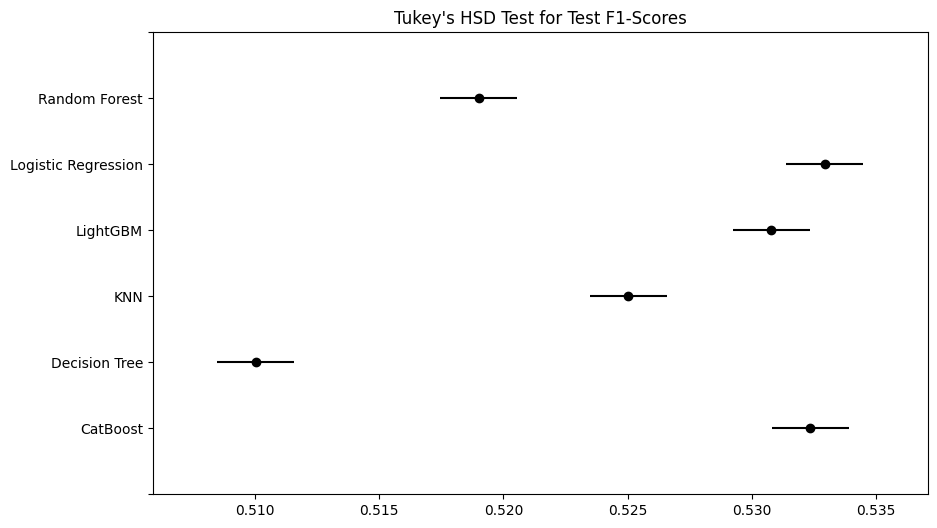

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test on test F1-scores
tukey_test = pairwise_tukeyhsd(endog=all_metrics_df['Test F1-Score'],
                               groups=all_metrics_df['Model'], alpha=0.05)
print(tukey_test)

# Plot the results of Tukey's HSD test
tukey_test.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey's HSD Test for Test F1-Scores")
plt.show()


# Extract Metrics in CSV

In [ ]:
knn_metrics_df['Model'] = 'KNN'
log_reg_metrics_df['Model'] = 'Logistic Regression'
rf_metrics_df['Model'] = 'Random Forest'
catboost_metrics_df['Model'] = 'CatBoost'
lgb_metrics_df['Model'] = 'LightGBM'
dt_metrics_df['Model'] = 'Decision Tree'


# Combine all DataFrames into one
combined_metrics_df = pd.concat([knn_metrics_df, log_reg_metrics_df, rf_metrics_df, catboost_metrics_df, lgb_metrics_df, dt_metrics_df], ignore_index=True)

# Export the combined DataFrame to a CSV file
combined_metrics_df.to_csv("model_evaluation_results.csv", index=False)

print("Results have been exported to 'model_evaluation_results.csv'")


Results have been exported to 'model_evaluation_results.csv'


# Final Conclusions

In [ ]:
# List of models and their names
models = {
    'Logistic Regression': best_log_reg,
    'KNN': best_knn,
    'Random Forest': best_rf,
    'CatBoost': best_catboost,
    'LightGBM': best_lgb,
    'Decision Tree': best_dt
}

# Initialize an empty list to store the results
final_results = []

# Iterate over each model and evaluate on the test set
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:, 1]

    accuracy, precision, recall, f1, roc_auc, cm = calculate_metrics(model, y_pred, y_proba)

    # Append the results
    final_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(final_results)

# Display the summary table
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv("final_model_results.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0  Logistic Regression  0.884643   0.377598  0.906037  0.533045  0.947265   
1                  KNN  0.875617   0.363780  0.950197  0.526132  0.952189   
2        Random Forest  0.871535   0.356129  0.950262  0.518093  0.955492   
3             CatBoost  0.878287   0.369071  0.951181  0.531797  0.957391   
4             LightGBM  0.877796   0.368045  0.950591  0.530640  0.957288   
5        Decision Tree  0.864817   0.344092  0.949278  0.505097  0.947190   

                   Confusion Matrix  
0  [[171715, 22760], [1432, 13808]]  
1   [[169149, 25326], [759, 14481]]  
2   [[168292, 26183], [758, 14482]]  
3   [[169694, 24781], [744, 14496]]  
4   [[169600, 24875], [753, 14487]]  
5   [[166898, 27577], [773, 14467]]  
